In [149]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [150]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

y = [0], it's a 'non-cat' picture.


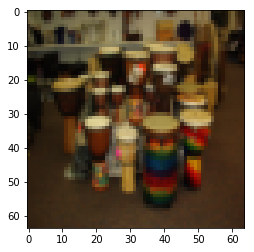

In [151]:
index = 5
plt.imshow(train_set_x_orig[index])
print('y = ' + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode('utf-8') + "' picture.")

In [152]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

In [153]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [154]:
train_set_x_flatten.shape

(12288, 209)

In [155]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [156]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [157]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [158]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    grads = {'dw': dw,
             'db': db}
    
    return grads, cost

In [159]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("cost after iteration %i: %f" %(i, cost))
    
    params = {'w': w,
              'b': b}
    
    grads = {'dw': dw,
             'db': db}
    return params, grads, costs

In [160]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [161]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train,num_iterations,learning_rate,print_cost)
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w,b, X_train)
    
    
    print('train accuracy: {} %'.format(100-np.mean(np.abs(Y_prediction_train-Y_train ))* 100))
    print('test accurate: {} %'.format(100-np.mean(np.abs(Y_prediction_test-Y_test)) * 100))
    
    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w': w,
         'b': b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}
    return d

In [162]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iteration 0: 0.693147
cost after iteration 100: 0.584508
cost after iteration 200: 0.466949
cost after iteration 300: 0.376007
cost after iteration 400: 0.331463
cost after iteration 500: 0.303273
cost after iteration 600: 0.279880
cost after iteration 700: 0.260042
cost after iteration 800: 0.242941
cost after iteration 900: 0.228004
cost after iteration 1000: 0.214820
cost after iteration 1100: 0.203078
cost after iteration 1200: 0.192544
cost after iteration 1300: 0.183033
cost after iteration 1400: 0.174399
cost after iteration 1500: 0.166521
cost after iteration 1600: 0.159305
cost after iteration 1700: 0.152667
cost after iteration 1800: 0.146542
cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accurate: 70.0 %


y = [1], you predicted that is a "cat" picture


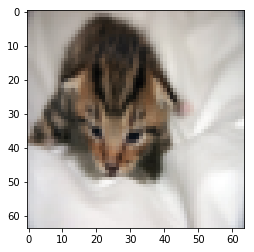

In [163]:
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px,num_px, 3)))
print('y = ' + str(test_set_y[:,index]) + ', you predicted that is a "' + classes[np.squeeze(test_set_y[:,1])].decode('utf-8') + '" picture')

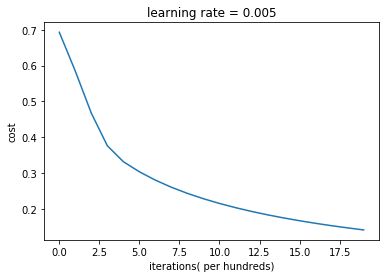

In [164]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations( per hundreds)')
plt.title('learning rate = ' + str(d['learning_rate']))
plt.show()

learning_rate is:0.01
train accuracy: 99.52153110047847 %
test accurate: 68.0 %

-----------------------------------------------
learning_rate is:0.001
train accuracy: 88.99521531100478 %
test accurate: 64.0 %

-----------------------------------------------
learning_rate is:0.0001
train accuracy: 68.42105263157895 %
test accurate: 36.0 %

-----------------------------------------------


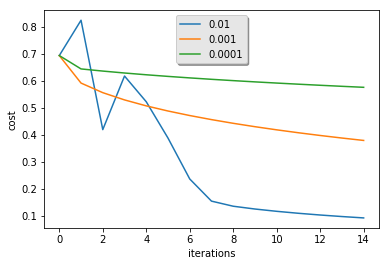

In [167]:
learning_rate = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print('learning_rate is:' + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print('\n' + "-----------------------------------------------")

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

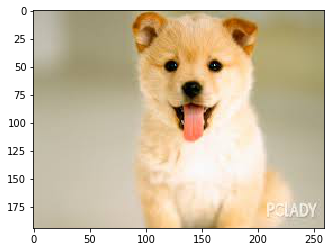

In [208]:
fname = '/Users/zhouzhangli/Desktop/Unknown-1.jpeg'
image = plt.imread(fname)
plt.imshow(image)

In [209]:
image.shape

(194, 259, 3)

In [210]:
from skimage import transform
image_tran = transform.resize(image,(64,64,3)).reshape(64*64*3,1)

/Users/zhouzhangli/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [211]:
image_tran.shape

(12288, 1)

In [212]:
y = predict(d['w'], d['b'], image_tran)
print(int(np.squeeze(y)))

1
